<a href="https://colab.research.google.com/github/cristianofanchin/puc-rio/blob/main/MVP_Sprint_ADBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Brasao Puc-Rio](https://www.puc-rio.br/imagens/bras_83x140_reduzido.png)

## Puc-Rio
## Pós-Graduação em Ciência de Dados e Analytics
Aluno: Cristiano Weiber Fanchin


## Sprint 1 - Análise de Dados e Boas Práticas - MVP


---

O trabalho aqui apresentado contempla as etapas de análise exploratória e pré-processamento de dados em um dataset contendo mais de 128 mil registros de características de indivíduos e seu perfil psicológico, com base no Indicador de Tipo Myers-Briggs (MBTI), formulado por Katharine Cook Briggs e Isabel Briggs Myer.

O indicador se baseia nas teorias de tipos psicológicos formuladas pelo psiquiatra Carl Jung, oferecendo uma abordagem detalhada para a compreensão das diferenças individuais na personalidade.

![texto alt](https://github.com/cristianofanchin/puc-rio/blob/main/img1.png?raw=true)

O processo envolve responder a uma série de perguntas que avaliam as preferências do indivíduo em **quatro dimensões** principais:

*   Extroversão (E) vs. Introversão (I)
*   Sensação (S) vs. Intuição (N)
*   Pensamento (T) vs. Sentimento (F)
*   Julgamento (J) vs. Percepção (P)

Cada uma dessas dimensões tem duas categorias opostas, e as respostas ao questionário determinam em qual categoria de cada dimensão a pessoa se encaixa. Combinando essas preferências, o MBTI classifica os indivíduos em um dos 16 tipos de personalidade possíveis, cada um representado por um código de quatro letras, organizados em 4 grupos: Racionalizadoras, Realizadoras, Idealistas e Exploradoras.

### Racionalizadoras
*Pessoas que se destacam pela abordagem lógica e analítica para resolver problemas. São estrategistas e pensadores independentes, focados em otimização e melhorias.*
1. Arquiteto (INTJ)
2. Lógico (INTP)
3. Inventor (ENTP)
4. Comandante (ENTJ)

### Realizadoras
*Pessoas organizadas e responsáveis, com uma forte orientação para a estrutura e o suporte aos outros. Valorizam a eficiência e o cumprimento de responsabilidades.*
5. Administrador (ISTJ)
6. Supervisor (ESTJ)
7. Provedor (ESFJ)
8. Defensor (ISFJ)

### Idealistas
*Pessoas guiadas por valores profundos e ideais pessoais. Buscam compreender e apoiar os outros, motivadas por um desejo de fazer a diferença e contribuir para causas que acreditam ser justas.*
9. Advogado (INFJ)
10. Mediador (INFP)
11. Protagonista (ENFP)
12. Mentor (ENFJ)

### Exploradoras
*Pessoas práticas e enérgicas, sempre em busca de novas experiências e aventuras. São adaptáveis e espontâneas, com uma abordagem direta para viver e explorar o mundo ao seu redor.*
13. Virtuoso (ISTP)
14. Aventureiro (ISFP)
15. Empreendedor (ESTP)
16. Animador (ESFP)

Fonte: https://br.indeed.com/conselho-de-carreira/desenvolvimento-de-carreira/tipos-de-personalidade

Obs: uma descrição de cada um dos 16 perfis pode ser consultada na URL acima.


---



O dataset em questão, hospedado no Kaggle [neste link](https://www.kaggle.com/datasets/stealthtechnologies/predict-people-personality-types/data), contém atributos representando as quatro dimensões acima citadas pertencentes ao modelo de Myers-Briggs, o perfil de personalidade MBTI resultante, bem como fatores adicionais de cada indivíduo da amostra: idade, gênero, grau de educação e área de interesse principal.

Esse dataset destina-se a estudos de Ciência de Dados e foi por esse motivo escolhido para o MVP, pois permite exercitar visualização de dados, análise de correlações entre atributos e pré-processamento visando a futuras construções de modelos de *machine learning*.

## Conhecendo o Dataset

Importação das bibliotecas necessárias:

In [235]:
# importação dos módulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Leitura dos dados para um dataframe do Pandas:

In [236]:
# carga do dataset armazenado no GitHub
url = 'https://raw.githubusercontent.com/cristianofanchin/puc-rio/refs/heads/main/people_personality_types.csv'
df = pd.read_csv(url)

Análise das informações principais do dataset:

In [237]:
# dimensões do dataset
df.shape

(128061, 9)

In [238]:
# informações básicas do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


In [239]:
# exibição das primeiras linhas
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


Observando o retorno dos métodos `df.info()` e `df.head()`, identificamos as variáveis numéricas e categóricas do dataset.

Segundo a documentação presente no Kaggle, as variáveis numéricas *Score* da lista abaixo são números reais que variam entre 0 e 10 e representam a tendência do indivíduo em cada uma das dimensões avaliadas:



Variável Score              | Valor alto indica: | Valor baixo indica:
----------------------------|--------------------|------------------
**Introversion Score**      |   extroversão      |  introversão
**Sensing Score**           |   sensação         |  intuição
**Thinking Score**          |   pensamento       |  sentimento
**Judging Score**           |   julgamento       |  percepção



Outra variável numérica é *Age* (idade do indivíduo).

As demais variáveis do dataset são categóricas:



*   *Gender*
        variável binária em forma de string, para represnetar o gênero masculino ou feminino.
*   *Education*
        variável binária, sendo 1 para indicar nível superior completo ou maior, ou 0 para os níveis educacionais inferiores.
*   *Interest*
        string representando a área de interesse principal, possivelmente apontada pelo indivíduo na resposta ao questionário.
*   *Personality*
        string de 4 caracteres representando um dos 16 tipos de personalidade do indivíduo segundo o MBTI.



##Descrição do Problema de Ciência de Dados

Pela análise inicial do dataset, percebe-se que os seguintes estudos são possíveis:


*   Análise da amostra para fins de estudos estatísticos dos perfis psicológicos;
*   Avaliação das características por meio de visualização dos dados;
*   Busca de correlações entre os atributos e sua interpretação;
*   Construção de modelo(s) de *machine learning*.

Para essa última possibilidade, o atributo *Personality*  pode ser encarado como o *target* de um modelo de aprendizagem supervisionado, do tipo **classificação**.

Nesse MVP iremos avaliar se os dados presentes no dataset permitem essa abordagem.



## Análise dos Dados

In [240]:
# sumário estatístico do dataset
df.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000
mean,26.349091,0.411156,4.996387,5.081893,4.988040,4.578293
std,4.908022,0.492045,2.888636,1.183236,2.886018,1.391582
min,18.000000,0.000000,0.000040,0.000000,0.000050,0.000000
25%,23.000000,0.000000,2.490710,4.315659,2.488630,3.709353
50%,25.000000,0.000000,4.993640,5.124169,4.984180,4.690653
75%,29.000000,1.000000,7.500170,5.892288,7.492550,5.561229
max,57.000000,1.000000,9.999990,9.788815,9.999970,9.840494


In [241]:
# verificação de nulos
df.isnull().sum()

,0
Age,0
Gender,0
Education,0
Introversion Score,0
Sensing Score,0
Thinking Score,0
Judging Score,0
Interest,0
Personality,0


In [242]:
# verificação de linhas duplicadas
df.duplicated().sum()

0

Pelos comandos acima, percebemos que o dataset está bastante "limpo", pois:
*   todos os atributos têm a mesma quantidade de registros (não há dados faltantes e nem nulos);
*   não há duplicação de linhas;
*   as variáveis numéricas de *Score* estão dentro do domínio previsto (0 a 10);
*   a variável numérica *Age* não tem dados inconsistentes.

Também aprendemos que todos os indivíduos desse dataset possuem idade maior ou igual a 18 anos, sendo o mais velho com 57 anos e a média em 26,3 anos. É uma amostra de uma população jovem.


---



**Variáveis Categóricas**

Consulta ao domínio das variáveis categóricas:

In [243]:
print(f"Gêneros: {df['Gender'].unique()}\n")
print(f"Educação: {df['Education'].unique()}\n")
print(f"Interesses: {df['Interest'].unique()}\n")
print(f"Personalidade: {df['Personality'].unique()}")

Gêneros: ['Male' 'Female']

Educação: [0 1]

Interesses: ['Unknown' 'Sports' 'Others' 'Technology' 'Arts']

Personalidade: ['ENFP' 'ESFP' 'INTP' 'INFP' 'ENFJ' 'ENTP' 'ESTP' 'ISTP' 'INTJ' 'INFJ'
 'ISFP' 'ENTJ' 'ESFJ' 'ISFJ' 'ISTJ' 'ESTJ']


Percebemos que as variáveis categóricas também possuem dados dentro do domínio esperado, sem valores inconsistentes.

Vamos analisar agora a quantidade de homens e mulheres na amostra, bem como a média de idade por gênero:

In [244]:
# quantidade de registros por gênero
df['Gender'].value_counts()

,count
Gender,
Male,70432
Female,57629


In [245]:
# média de idades, agrupado por gênero
df.loc[:,['Age','Gender']].groupby('Gender').mean()

,Age
Gender,
Female,26.35876
Male,26.34118


No dataset há mais homens e a média de idade dos homens e das mulheres é praticamente a mesma.


---



Vamos construir agora os primeiros gráficos. Iniciamos analisando as duas variáveis categóricas binárias do dataset: *Gender* e *Education*:

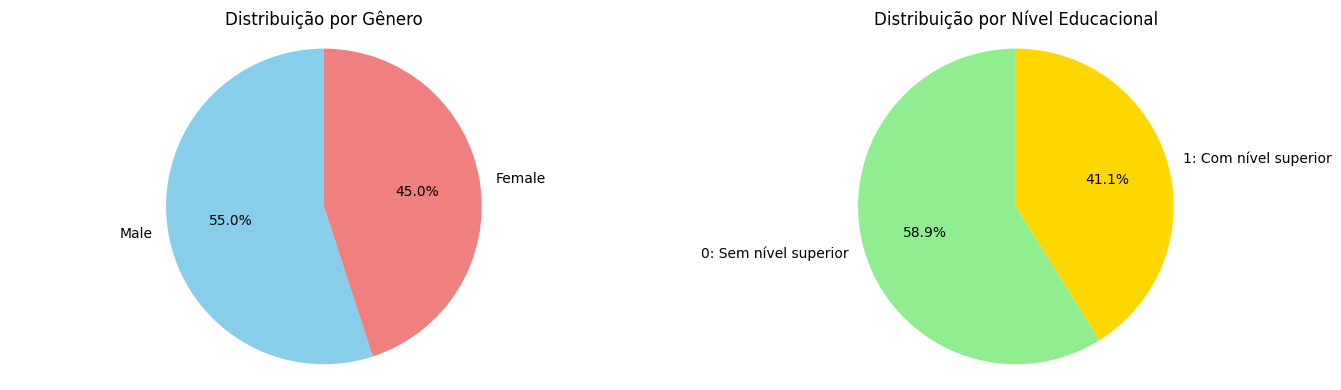

In [246]:
# Contar a frequência de cada categoria para "Gender" e "Education"
gender_counts = df['Gender'].value_counts()
education_counts = df['Education'].value_counts()

# Criar uma figura com dois subplots (1 linha, 2 colunas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Gerar os gráficos de pizza com percentuais
gender_counts.plot(kind='pie',
                   autopct='%1.1f%%',   # Exibir percentuais com 1 casa decimal
                   startangle=90,       # Começar o gráfico no ângulo de 90 graus
                   colors=['skyblue', 'lightcoral'],  # Cores para as fatias
                   ax=ax1,              # Usar o primeiro subplot
                   ylabel='',           # Remover o rótulo automático do eixo y
                   title='Distribuição por Gênero')

education_counts.plot(kind='pie',
                      autopct='%1.1f%%',   # Exibir percentuais com 1 casa decimal
                      startangle=90,       # Começar o gráfico no ângulo de 90 graus
                      colors=['lightgreen', 'gold'],  # Cores para as fatias
                      ax=ax2,              # Usar o segundo subplot
                      ylabel='',           # Remover o rótulo automático do eixo y
                      labels=['0: Sem nível superior','1: Com nível superior'],
                      title='Distribuição por Nível Educacional')

# Garantir que os gráficos de pizza sejam círculos
ax1.axis('equal')
ax2.axis('equal')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

Prosseguindo com a análise das variáveis de Gênero e Nível Educacional, iremos estudar como elas se relacionam com as Áreas de Interesse (outra variável categórica do dataset, contendo 5 categorias):

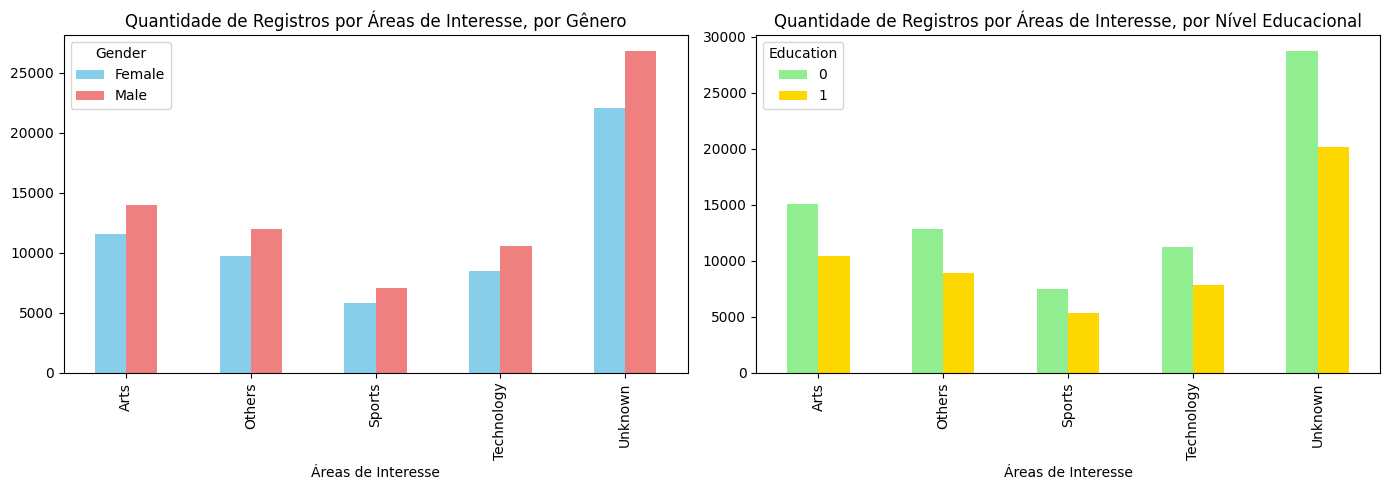

In [247]:
# gerar dataframe temporário para gráfico
grouped_counts_gender = df.groupby(['Interest', 'Gender']).size().unstack()
grouped_counts_educ = df.groupby(['Interest', 'Education']).size().unstack()

# Criar uma figura com dois subplots (1 linha, 2 colunas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gerar os gráficos de barras

grouped_counts_gender.plot(kind='bar',
                           ax=ax1,
                           stacked=False,
                           color=['skyblue', 'lightcoral'],
                           title = 'Quantidade de Registros por Áreas de Interesse, por Gênero',
                           xlabel = 'Áreas de Interesse',
                           ylabel = '')

grouped_counts_educ.plot(kind='bar',
                           ax=ax2,
                           stacked=False,
                           color=['lightgreen', 'gold'],
                           title = 'Quantidade de Registros por Áreas de Interesse, por Nível Educacional',
                           xlabel = 'Áreas de Interesse',
                           ylabel = '')


# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


O gráfico a seguir nos ilustrará as ocorrências de cada uma das 16 classes de tipos de personalidade:


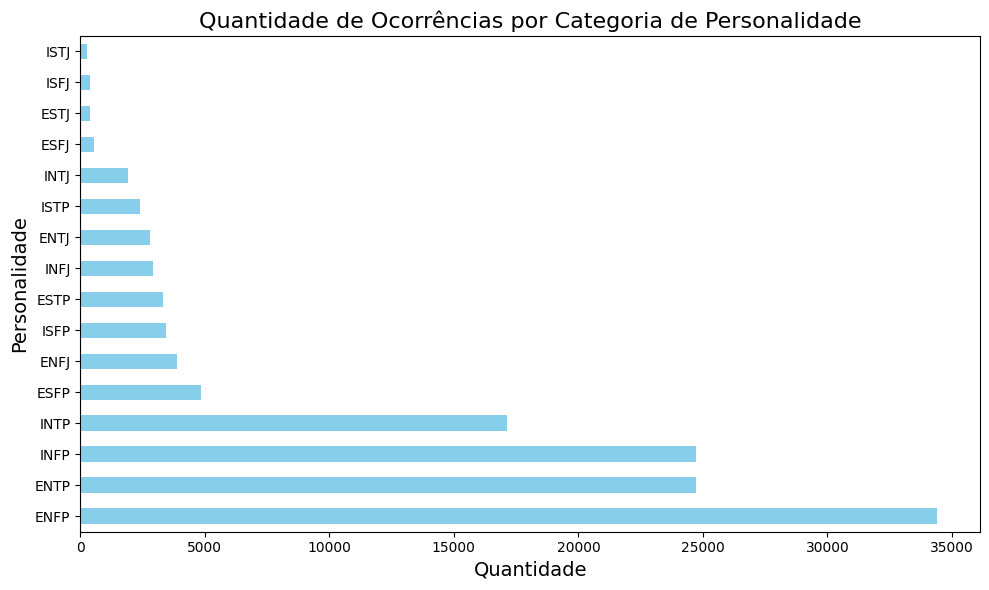

In [248]:
# Contar a frequência de cada categoria na coluna "Personality"
personality_counts = df['Personality'].value_counts()

# Gerar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
personality_counts.plot(kind='barh', color='skyblue')

# Personalizar o gráfico
plt.title('Quantidade de Ocorrências por Categoria de Personalidade', fontsize=16)
plt.xlabel('Quantidade', fontsize=14)
plt.ylabel('Personalidade', fontsize=14)

# Exibir o gráfico
plt.tight_layout()
plt.show()

Percebemos grande quantidade das classes INTP, INFP, ENTP e ENFP.
Um trabalho completo de *machine learnig* para classificação deverá avaliar se o dataset poderá ser usado para treinar e testar o modelo.


Vamos construir agora gráficos de Pareto para avaliar a ocorrencia dos tipos de personalidade:





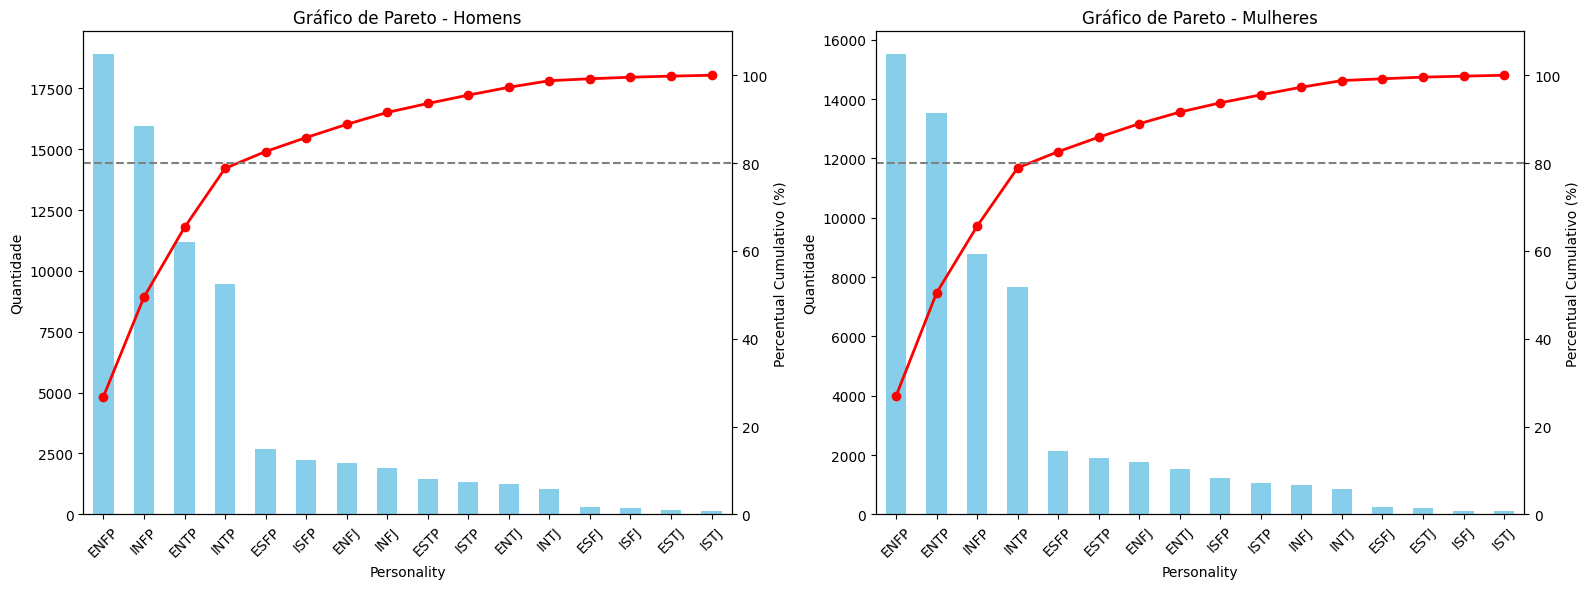

In [249]:
# Filtrar dados pelos Gêneros "Male" e "Female"
male_data = df[df['Gender'] == 'Male']['Personality'].value_counts().sort_values(ascending=False)
female_data = df[df['Gender'] == 'Female']['Personality'].value_counts().sort_values(ascending=False)

# Função para plotar gráfico de Pareto
def pareto_chart(data, ax, title):
    # Calcular percentual cumulativo
    cum_perc = data.cumsum() / data.sum() * 100

    # Plotar gráfico de barras para as quantidades
    data.plot(kind='bar', ax=ax, color='skyblue')

    # Plotar a linha de percentual cumulativo
    ax2 = ax.twinx()
    ax2.plot(cum_perc.index, cum_perc, color='red', marker='o', linestyle='-', linewidth=2)
    ax2.set_ylim([0, 110])

    # Rótulos e título
    ax.set_ylabel('Quantidade')
    ax2.set_ylabel('Percentual Cumulativo (%)')
    ax.set_title(title)
    ax2.axhline(80, color='gray', linestyle='--')  # Linha de referência dos 80%

    # Ajustar layout
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()

# Criar uma figura com dois subplots (1 linha, 2 colunas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de Pareto para "Male"
pareto_chart(male_data, ax1, 'Gráfico de Pareto - Homens')

# Gráfico de Pareto para "Female"
pareto_chart(female_data, ax2, 'Gráfico de Pareto - Mulheres')

# Exibir os gráficos
plt.show()


Focando nas categorias de maior incidência, podemos identificar que são basicamente as mesmas para homes e mulheres, havendo uma inversão entre eles do segundo e terceiro lugar (INFP x ENTP).



---



**Variáveis Numéricas**

O método `describe()` nos mostrou que as quatro variáveis numéricas de *Score* têm média próximo de 5, o que nos sugere uma distribuição simétrica em relação ao meio da escala. Vamos traçar inicialmente um histograma simples do dataset:

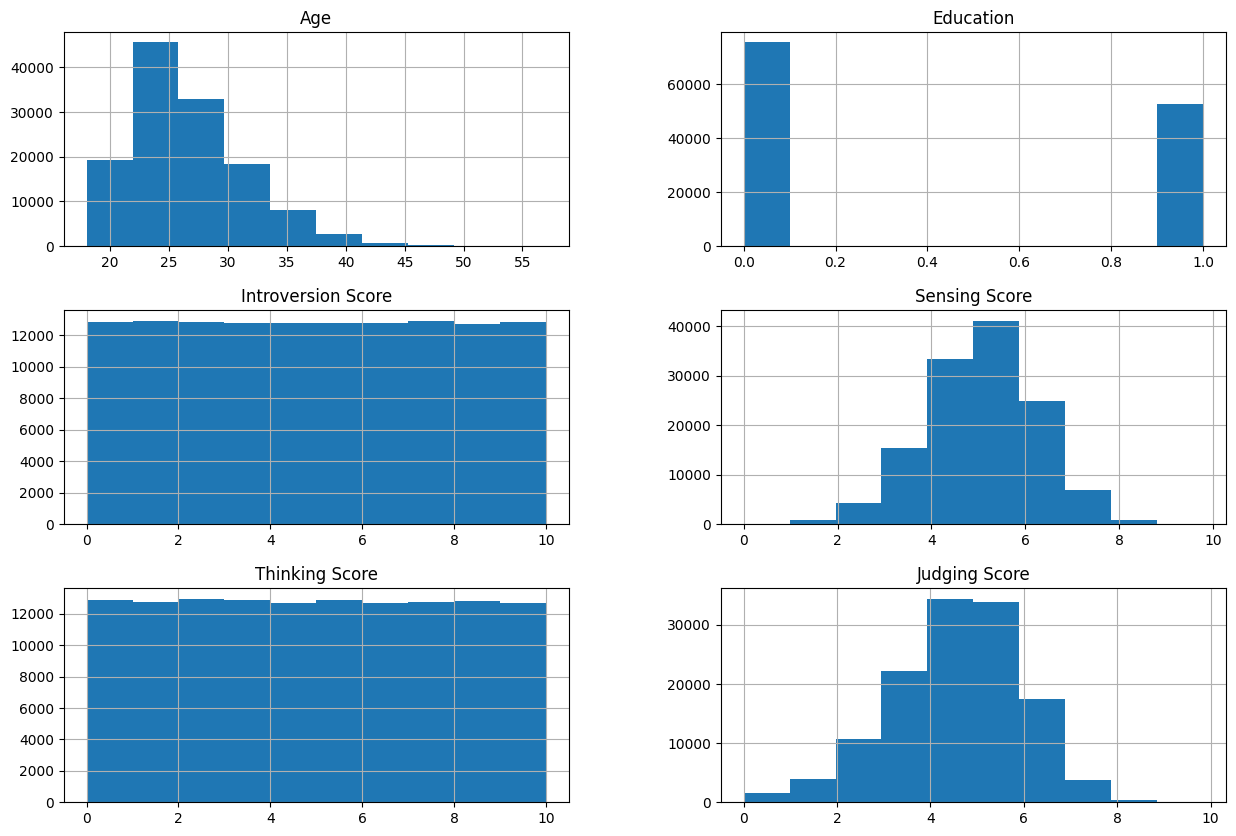

In [250]:
# Histograma
df.hist(figsize = (15,10))
plt.show()

Percebemos que, apesar de ser uma variável categórica, o método `hist()` entendeu *Education* como uma variável numérica, devido aos seus valores **0** ou **1**. Vamos prosseguir sem nos preocupar por isso agora e tampouco nos próximos gráficos em que isso ocorrer.

Os histogramas nos levam a pensar que:


*   *Introversion Score* e *Thinking Score* estão uniformemente distribuídas entre 0 e 10, que é o seu domínio;
*   *Sensing Score* e *Judging Score* têm distribuições que podem ser transformadas para a curva normal;
*   A variável *Age* tem distribuição assimétrica à direita.







Uma melhor visualização é possível por meio do *Density Plot* do Matplolib:

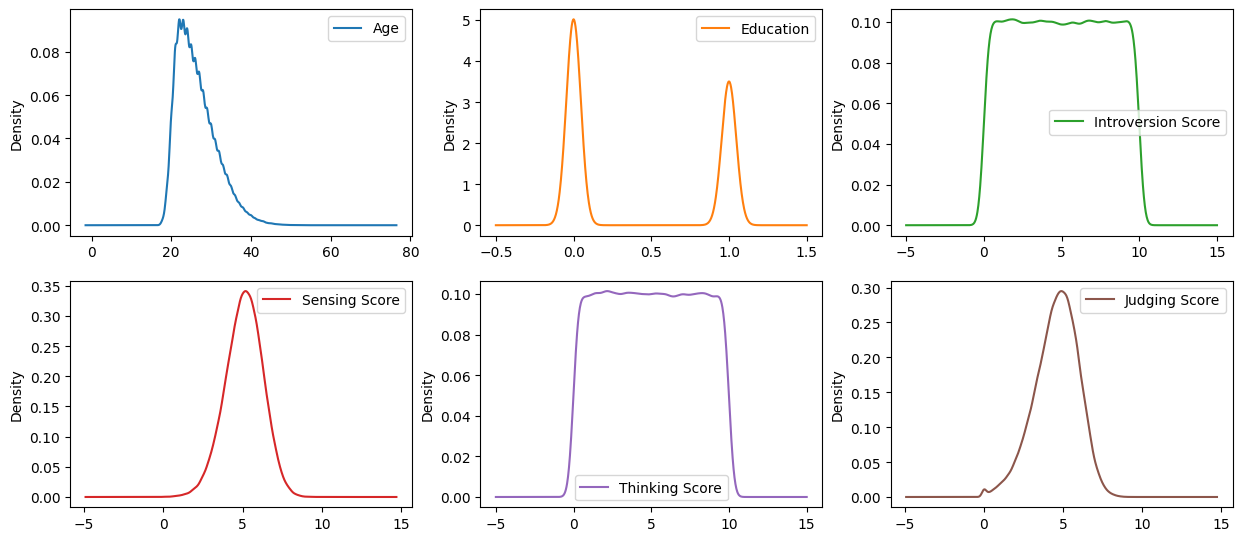

In [251]:
# Density Plot
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

A hipótese levantada acima sobre as distribuições parece se confirmar, agora que temos os *Density Plots*.

Vamos verificar a variável *Age*:

In [252]:
# Medidas de tendência central de variável Age
print('Age:')
print(f"  Média: {df['Age'].mean()}")
print(f"  Mediana: {df['Age'].median()}")
print(f"  Moda: {df['Age'].mode().values[0]}")

Age:
  Média: 26.349091448606522
  Mediana: 25.0
  Moda: 22.0


Como Média > Mediana > Moda, confirmamos a **assimetria à direita**.

Gerando Boxplots para as variáveis do dataset:

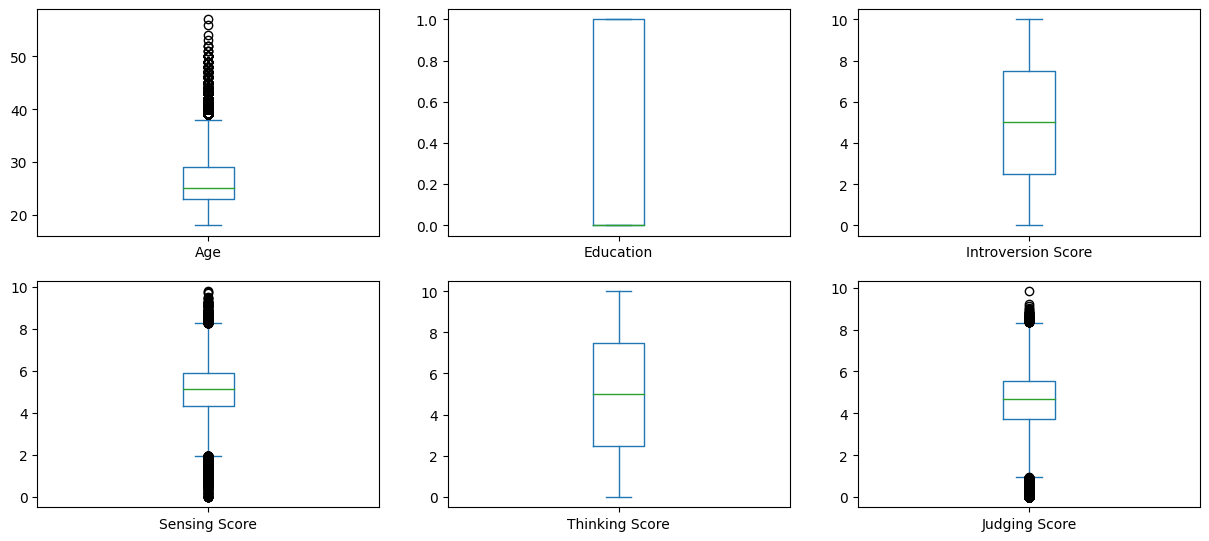

In [253]:
# Boxplot
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

A interpretação dos *Boxplots* é de que as variáveis *Age*, *Sensing Score* e *Judging Soce*, por terem maior concentração na região das suas médias, encaram como *outliers* aqueles indivíduos mais afastados da média. Já nas variáveis *Introversion Score* e *Thinking Score* não aparecem outliers, pois há quantidade numerosa de indivíduos ao longo de todo o domínio das mesmas.

Utilizando Seaborn, vamos agora avaliar a distribuição das idades dos indivíduos classificados em cada perfil psicológico, agrupados pelo seu gênero:

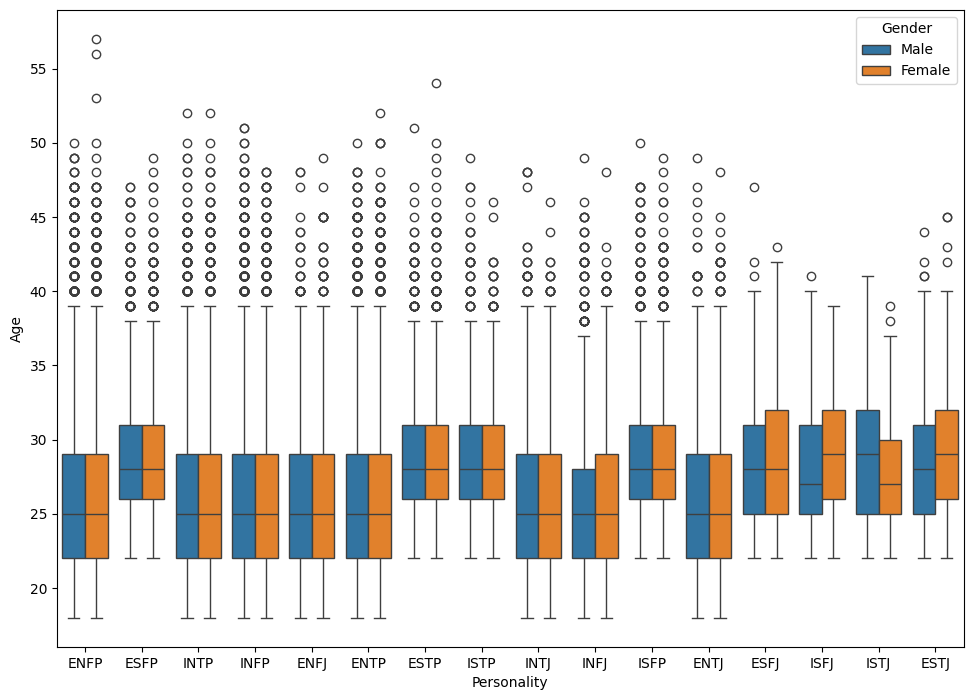

In [254]:
sns.boxplot(data = df, x = 'Personality', y = 'Age', hue='Gender')
plt.gcf().set_size_inches(11.7, 8.27)
plt.show()

Pela análise do gráfico acima, compreendemos que alguns tipos de personalidade são mais concentrados em indivíduos de uma faixa etária levemente superior. Como a amostra é majoritariamente de jovens e essa diferença entre as medianas é pequena (menor que 5 anos), podemos entender essa percepção como algo de menor relevância.
Sobre os gêneros, tampouco se observa variação significativa.

## Pré-Processamento dos Dados

Em função dos *insights* obtidos na seção anterior, iremos realizar as seguintes tarefas de pré-processamento do dataset:


*   Transformação categórica das variáveis *Gender* e *Interest* pelo método *one-hot encoding*;
*   Padronização das variáveis numéricas *Sensing Score* e *Judging Score*.

Observações:



1.   Pela composição do dataset, não há etapa de limpeza a ser executada;
2.   A variável *Education* original já se encontra codificada (técnica de *label encoding*);
3.   As variáveis *Introversion Score* e *Thinking Score* não passarão por transformação numérica, dado que um processo de padronização alteraria significativamente a distribuição original que se assemelha à do tipo uniforme. Tampouco vimos necessidade de normalização, por ora. Em estudos futuros, com maior conhecimento dos requisitos do modelo de *machine learning* a ser aplicado, essa decisão poderá ser revista.






In [255]:
# importando as biliotecas necessárias
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

**Transformações categóricas**

In [256]:
#One Hot Encoding para Gender e Interest

# Criar uma instância do OneHotEncoder
encoder = OneHotEncoder(drop=None, sparse_output=False)

# Fazer o fit_transform nas colunas "Gender" e "Interest"
encoded_columns = encoder.fit_transform(df[['Gender', 'Interest']])

# Converter o resultado para um DataFrame com os nomes das colunas
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Gender','Interest']))

# Concatenar o DataFrame original com as novas colunas
df_final = pd.concat([df.drop(columns=['Gender', 'Interest']), encoded_df], axis=1)

# Exibir as primeiras linhas do DataFrame resultante
df_final.head()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Gender_Female,Gender_Male,Interest_Arts,Interest_Others,Interest_Sports,Interest_Technology,Interest_Unknown
0,19.0,0,9.47080,7.141434,6.03696,4.360278,ENFP,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,27.0,0,5.85392,6.160195,0.80552,4.221421,ESFP,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,21.0,0,7.08615,3.388433,2.66188,5.127320,ENFP,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,28.0,0,2.01892,4.823624,7.30625,5.986550,INTP,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,36.0,1,9.91703,4.755080,5.31469,4.677213,ENFP,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Percebemos as novas colunas introduzidas pela codificação.

**Padronização**

In [257]:
# Padronizando os dados
padr_SensingScore = StandardScaler().fit_transform(df[['Sensing Score']])
padr_JudgingScore = StandardScaler().fit_transform(df[['Judging Score']])


In [258]:
# Adicionando os dados padronizados ao DataFrame
df_final['Sensing Score'] = padr_SensingScore
df_final['Judging Score'] = padr_JudgingScore

Avaliação do dataframe resultante:

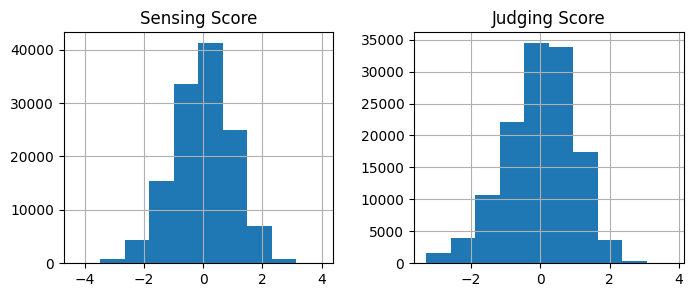

In [259]:
# Histograma
df_final[['Sensing Score','Judging Score']].hist(figsize = (8,3))
plt.show()

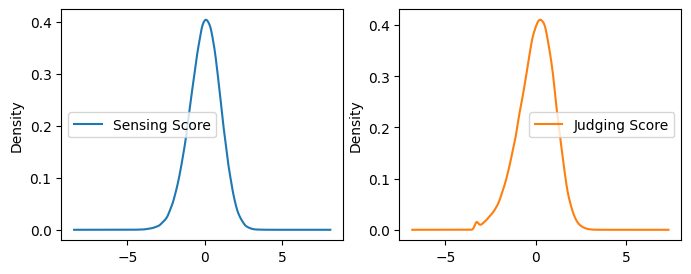

In [260]:
# Density Plot
df_final[['Sensing Score','Judging Score']].plot(kind = 'density', subplots = True, layout = (1,2), sharex = False, figsize = (8,3))
plt.show()

In [261]:
# sumário estatístico do dataframe após transformações
df_final.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Gender_Female,Gender_Male,Interest_Arts,Interest_Others,Interest_Sports,Interest_Technology,Interest_Unknown
count,128061.000000,128061.000000,128061.000000,1.280610e+05,128061.000000,1.280610e+05,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000
mean,26.349091,0.411156,4.996387,1.470345e-16,4.988040,-4.293407e-16,0.450012,0.549988,0.199038,0.169708,0.100741,0.149171,0.381342
std,4.908022,0.492045,2.888636,1.000004e+00,2.886018,1.000004e+00,0.497497,0.497497,0.399278,0.375378,0.300987,0.356258,0.485718
min,18.000000,0.000000,0.000040,-4.294926e+00,0.000050,-3.290005e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,2.490710,-6.475771e-01,2.488630,-6.244283e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,4.993640,3.572944e-02,4.984180,8.074336e-02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29.000000,1.000000,7.500170,6.849003e-01,7.492550,7.063477e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,57.000000,1.000000,9.999990,3.978022e+00,9.999970,3.781468e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Conclusão

O MVP permitiu explorar os conteúdos da sprint, exercitando as formas de análise, visualização e pré-processamento, com uso das bibliotecas Python especializadas.

Como recomendação de trabalhos futuros para esse dataset de características de indivíduos e seu perfil psicológico, visando à aplicação do mesmo em treinamento de modelos de *machine learning*, podemos elencar:


*   Avaliar se o modelo em questão necessitará de mais transformação das variáveis numéricas, ou de forma distinta da que foi apresentada nesse MVP;
*   Identificar se podem ser mantidas sem transformação as variáveis *Introversion Score* e *Thinking Score* e se isso causaria algum tipo de prejuízo ao modelo, dado que originalmente as quatro variáveis *Scores* tinham um mesmo domínio (0 a 10). Aquelas que foram padronizadas poderiam com isso perder "peso" no modelo, frente às demais?
*   Primeiramente separar o conjunto de dados entre Treino e Teste, para só depois aplicar a padronização ou normalização, evitando assim o vazamento de dados. Esse MVP não contemplou a separação dos conjuntos e, portanto, foram feitas transformações sobre todo o conjunto, a fim de exercitar a técnica.
*   Avaliar a necessidade de rebalanceamento das classes, pois viu-se uma proponderância das categorias INTP, INFP, ENTP e ENFP frente às demais.

